# 1. 필요 라이브러리 가져오기

In [11]:
# 한글로 그래프 제목 입력해도 글씨 깨지지 않게 함
# 코드 실행후 런타임 다시 시작하기!!

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,559 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
# import koreanize_matplotlib
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=2.5)
plt.rc("font", family="NanumBarunGothic")
plt.rc("axes", unicode_minus=False)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 2. 데이터셋 확인

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/data/감귤/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/data/감귤/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/data/감귤/sample_submission.csv')

In [4]:
df_train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [ ]:
df_test.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224


In [ ]:
df_train.columns

Index(['ID', '착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균',
       '2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순',
       ...
       '2022-11-19 엽록소', '2022-11-20 엽록소', '2022-11-21 엽록소', '2022-11-22 엽록소',
       '2022-11-23 엽록소', '2022-11-24 엽록소', '2022-11-25 엽록소', '2022-11-26 엽록소',
       '2022-11-27 엽록소', '2022-11-28 엽록소'],
      dtype='object', length=184)

## 2.1 Null data check

In [ ]:
for col in df_train.columns:
    msg = '변수명: {:>10}\t NaN 값의 확률: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

변수명:         ID	 NaN 값의 확률: 0.00%
변수명:   착과량(int)	 NaN 값의 확률: 0.00%
변수명:      수고(m)	 NaN 값의 확률: 0.00%
변수명:  수관폭1(min)	 NaN 값의 확률: 0.00%
변수명:  수관폭2(max)	 NaN 값의 확률: 0.00%
변수명:      수관폭평균	 NaN 값의 확률: 0.00%
변수명: 2022-09-01 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-02 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-03 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-04 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-05 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-06 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-07 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-08 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-09 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-10 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-11 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-12 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-13 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-14 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-15 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-16 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-17 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-18 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-19 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-20 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-21 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-22 새순	

In [ ]:
for col in df_test.columns:
    msg = '변수명: {:>10}\t NaN 값의 확률: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

변수명:         ID	 NaN 값의 확률: 0.00%
변수명:      수고(m)	 NaN 값의 확률: 0.00%
변수명:  수관폭1(min)	 NaN 값의 확률: 0.00%
변수명:  수관폭2(max)	 NaN 값의 확률: 0.00%
변수명:      수관폭평균	 NaN 값의 확률: 0.00%
변수명: 2022-09-01 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-02 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-03 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-04 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-05 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-06 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-07 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-08 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-09 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-10 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-11 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-12 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-13 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-14 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-15 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-16 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-17 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-18 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-19 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-20 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-21 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-22 새순	 NaN 값의 확률: 0.00%
변수명: 2022-09-23 

* train, test 데이터 모두 null data가 없다.

# 3. '수고'로 착과량 예측하기(선형 회귀) 

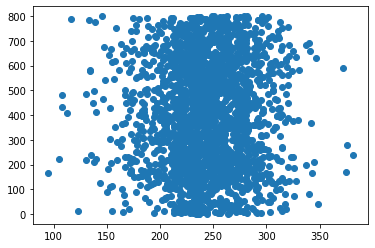

In [ ]:
# 학습 시킬 데이터의 수고, 착과량 분포보기
plt.scatter(df_train['수고(m)'], df_train['착과량(int)'])

In [ ]:
# 데이터 학습시키기
x_train = df_train[['수고(m)']]
y_train = df_train[['착과량(int)']]
x_test = df_test[['수고(m)']]

# 선형회귀 방식 이용
model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
model.coef_ # theta_1

array([[0.0427257]])

In [ ]:
model.intercept_ # theta_0

array([395.80894105])

* f(x) = 395.80894105 + 0.0427257x : 최적선

In [ ]:
# 예측값
y_test_prediction = model.predict(x_test)
y_test_prediction

array([[405.67857791],
       [404.61043539],
       [407.85758864],
       ...,
       [406.66126902],
       [406.78944612],
       [406.23401202]])

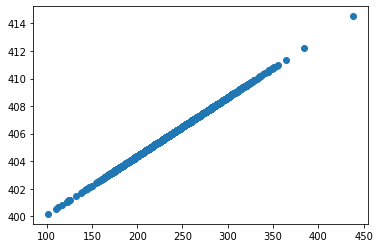

In [ ]:
# 학습된 모델로 예측된 착과량과 수고의 분포 보기
df_test['착과량(int)'] = y_test_prediction
plt.scatter(df_test['수고(m)'], df_test['착과량(int)'])

In [ ]:
sub['착과량(int)'] = y_test_prediction
sub.to_csv('/content/drive/MyDrive/data/감귤/sample_submission.csv', index = False)

In [ ]:
sub

,ID,착과량(int)
0,TEST_0000,405.678578
1,TEST_0001,404.610435
2,TEST_0002,407.857589
3,TEST_0003,405.806755
4,TEST_0004,405.294047
...,...,...
2203,TEST_2203,405.080418
2204,TEST_2204,403.585019
2205,TEST_2205,406.661269
2206,TEST_2206,406.789446


# 4. 다중 선형 회귀

In [ ]:
df_train.shape

(2207, 184)

* 184개의 변수가 존재한다.

In [ ]:
# 데이터 학습시키기
x_train = df_train.drop(['ID','착과량(int)'], axis = 1)
y_train = df_train[['착과량(int)']]
x_test = df_test.drop(['ID'], axis = 1)

# 선형회귀 방식 이용
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([[ 3.97020118e-04,  2.24631749e-04,  1.37861047e-02,
         7.00536825e-03, -3.90003923e+01, -2.25230277e+01,
        -1.40899110e+01, -4.01373112e+01, -1.38655219e+01,
        -7.37090655e+01, -5.05890858e+01,  8.86227386e+00,
        -3.12290609e+01, -7.07572698e+01, -2.99849925e+01,
         3.38304964e+01,  6.88312868e+01,  3.15300419e+01,
         1.76144905e+01, -3.03513882e+01,  8.84574134e+00,
        -2.17276998e+00,  2.12057010e+01, -1.13865837e+01,
        -5.95708097e+00,  7.39941576e+00,  3.75414049e-01,
        -7.25350663e+00,  9.94785471e+00,  2.44437386e+00,
         4.29350350e+01, -8.23181158e+01,  1.90120432e+00,
         1.10802751e+01,  5.81632061e+01,  5.67837221e+00,
         3.51113704e+00,  9.68500576e-01, -5.07802487e+01,
         4.88480151e-01, -1.70997760e+01, -3.21363342e+01,
        -2.69159260e+01,  5.18988650e+01, -3.48093389e+01,
        -1.61827212e+00, -4.32000024e+01, -1.83048310e+00,
         1.96380052e+01, -1.09298500e+01,  5.07222298e+0

In [ ]:
model.intercept_

array([1428.80954644])

In [ ]:
# 예측값
y_test_prediction = model.predict(x_test)
y_test_prediction

array([[268.11000659],
       [756.90183346],
       [156.33977049],
       ...,
       [380.46335315],
       [208.28057714],
       [ 99.96858636]])

In [ ]:
sub['착과량(int)'] = y_test_prediction
sub.to_csv('/content/drive/MyDrive/data/감귤/sample_submission.csv', index = False)

In [ ]:
sub

,ID,착과량(int)
0,TEST_0000,268.110007
1,TEST_0001,756.901833
2,TEST_0002,156.339770
3,TEST_0003,452.321785
4,TEST_0004,699.038390
...,...,...
2203,TEST_2203,754.224064
2204,TEST_2204,305.286388
2205,TEST_2205,380.463353
2206,TEST_2206,208.280577


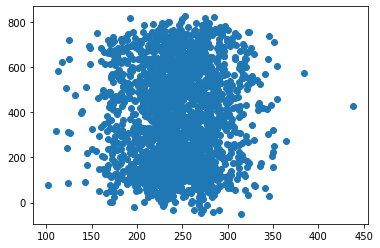

In [ ]:
# 학습된 모델로 예측된 착과량과 수고의 분포 보기
df_test['착과량(int)'] = y_test_prediction
plt.scatter(df_test['수고(m)'], df_test['착과량(int)'])

# 5. Decision TreeRregressor 활용

## 5.1 데이터 변환

In [21]:
df_train["새순 차이"] = df_train["2022-11-28 새순"] - df_train["2022-09-01 새순"]
df_train["엽록소 차이"] = df_train["2022-11-28 엽록소"] - df_train["2022-09-01 엽록소"]

df_train

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소,새순 차이,엽록소 차이
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251,-2.2,-8.293252
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600,-3.3,-9.689090
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578,-2.5,-8.718951
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970,-2.4,-8.802293
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093,-3.1,-8.823138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,TRAIN_2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,...,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547,-4.7,-8.464066
2203,TRAIN_2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,...,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396,-2.5,-8.976479
2204,TRAIN_2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,...,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459,-2.5,-9.007058
2205,TRAIN_2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,...,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084,-3.9,-8.297933


## 5.2 시각화

In [13]:
df_train.columns

Index(['ID', '착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균',
       '2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순',
       ...
       '2022-11-19 엽록소', '2022-11-20 엽록소', '2022-11-21 엽록소', '2022-11-22 엽록소',
       '2022-11-23 엽록소', '2022-11-24 엽록소', '2022-11-25 엽록소', '2022-11-26 엽록소',
       '2022-11-27 엽록소', '2022-11-28 엽록소'],
      dtype='object', length=184)

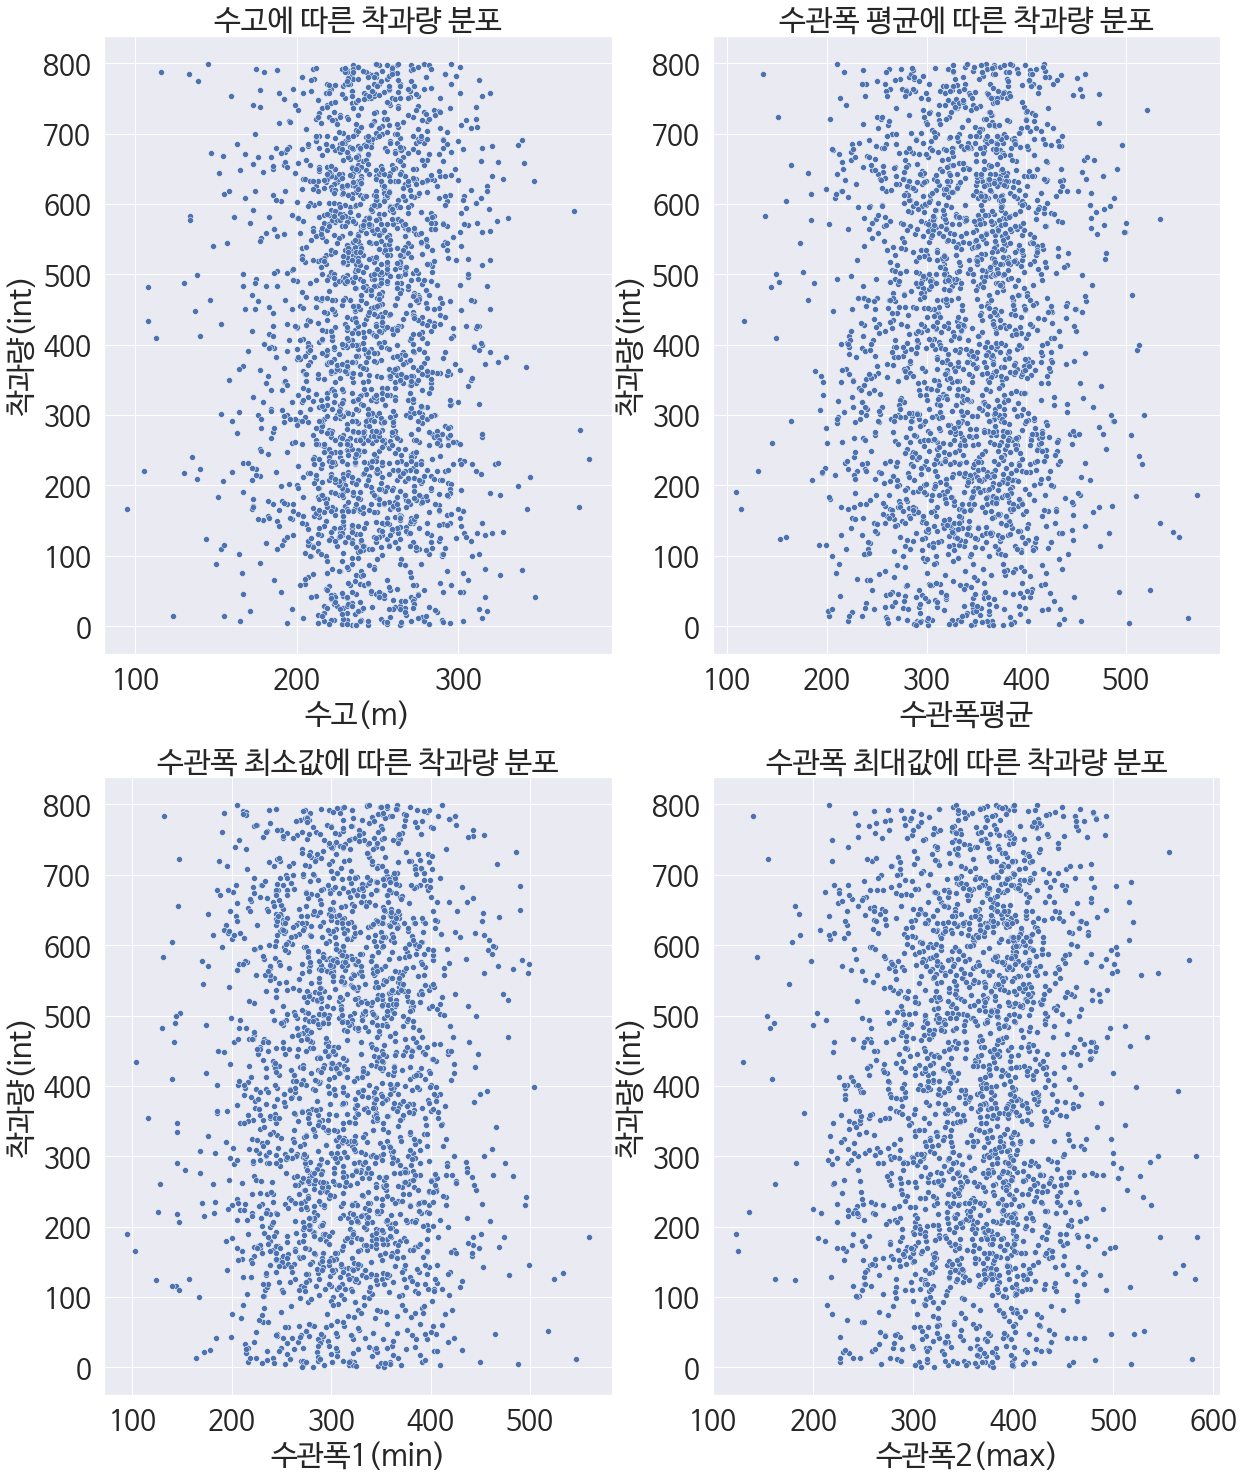

In [19]:
f, ax = plt.subplots(2, 2, figsize = (20, 25))
ax[0,0].set_title('수고에 따른 착과량 분포')
sns.scatterplot(data = df_train, x = '수고(m)', y = '착과량(int)', ax = ax[0,0])
ax[0,1].set_title('수관폭 평균에 따른 착과량 분포')
sns.scatterplot(data = df_train, x = '수관폭평균', y = '착과량(int)', ax = ax[0,1])
ax[1,0].set_title('수관폭 최소값에 따른 착과량 분포')
sns.scatterplot(data = df_train, x = '수관폭1(min)', y = '착과량(int)', ax = ax[1,0])
ax[1,1].set_title('수관폭 최대값에 따른 착과량 분포')
sns.scatterplot(data = df_train, x = '수관폭2(max)', y = '착과량(int)', ax = ax[1,1])

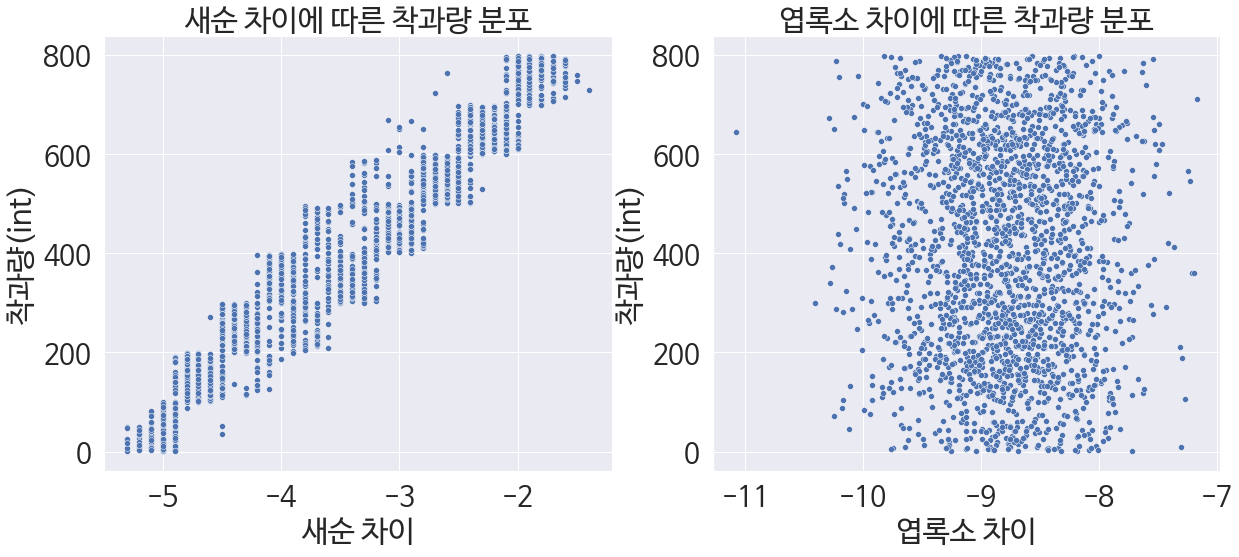

In [30]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
ax[0].set_title('새순 차이에 따른 착과량 분포')
sns.scatterplot(data = df_train, x = '새순 차이', y = '착과량(int)', ax = ax[0])
ax[1].set_title('엽록소 차이에 따른 착과량 분포')
sns.scatterplot(data = df_train, x = '엽록소 차이', y = '착과량(int)', ax = ax[1])

* 새순 차이에서는 유의미한 선형관계가 나타났다.
* 새순이 크게 감소할수록 착과량의 양이 줄어든다. 

## 5.3 모델 구현

In [37]:
df_train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소,새순 차이,엽록소 차이
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251,-2.2,-8.293252
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600,-3.3,-9.689090
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578,-2.5,-8.718951
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970,-2.4,-8.802293
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093,-3.1,-8.823138


In [39]:
df_test["새순 차이"] = df_test["2022-11-28 새순"] - df_test["2022-09-01 새순"]
df_test["엽록소 차이"] = df_test["2022-11-28 엽록소"] - df_test["2022-09-01 엽록소"]

df_test.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소,새순 차이,엽록소 차이
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223,-4.3,-9.299701
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849,-1.9,-7.941943
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319,-4.7,-8.813929
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171,-3.6,-8.675253
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224,-2.0,-9.337305


In [40]:
X_train = df_train.drop(['ID','착과량(int)'], axis=1)
y_train = df_train['착과량(int)']
X_test = df_test.drop(['ID'], axis = 1)

In [41]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
pred = model.predict(X_test)
pred

array([201., 771., 112., ..., 347., 237.,  79.])

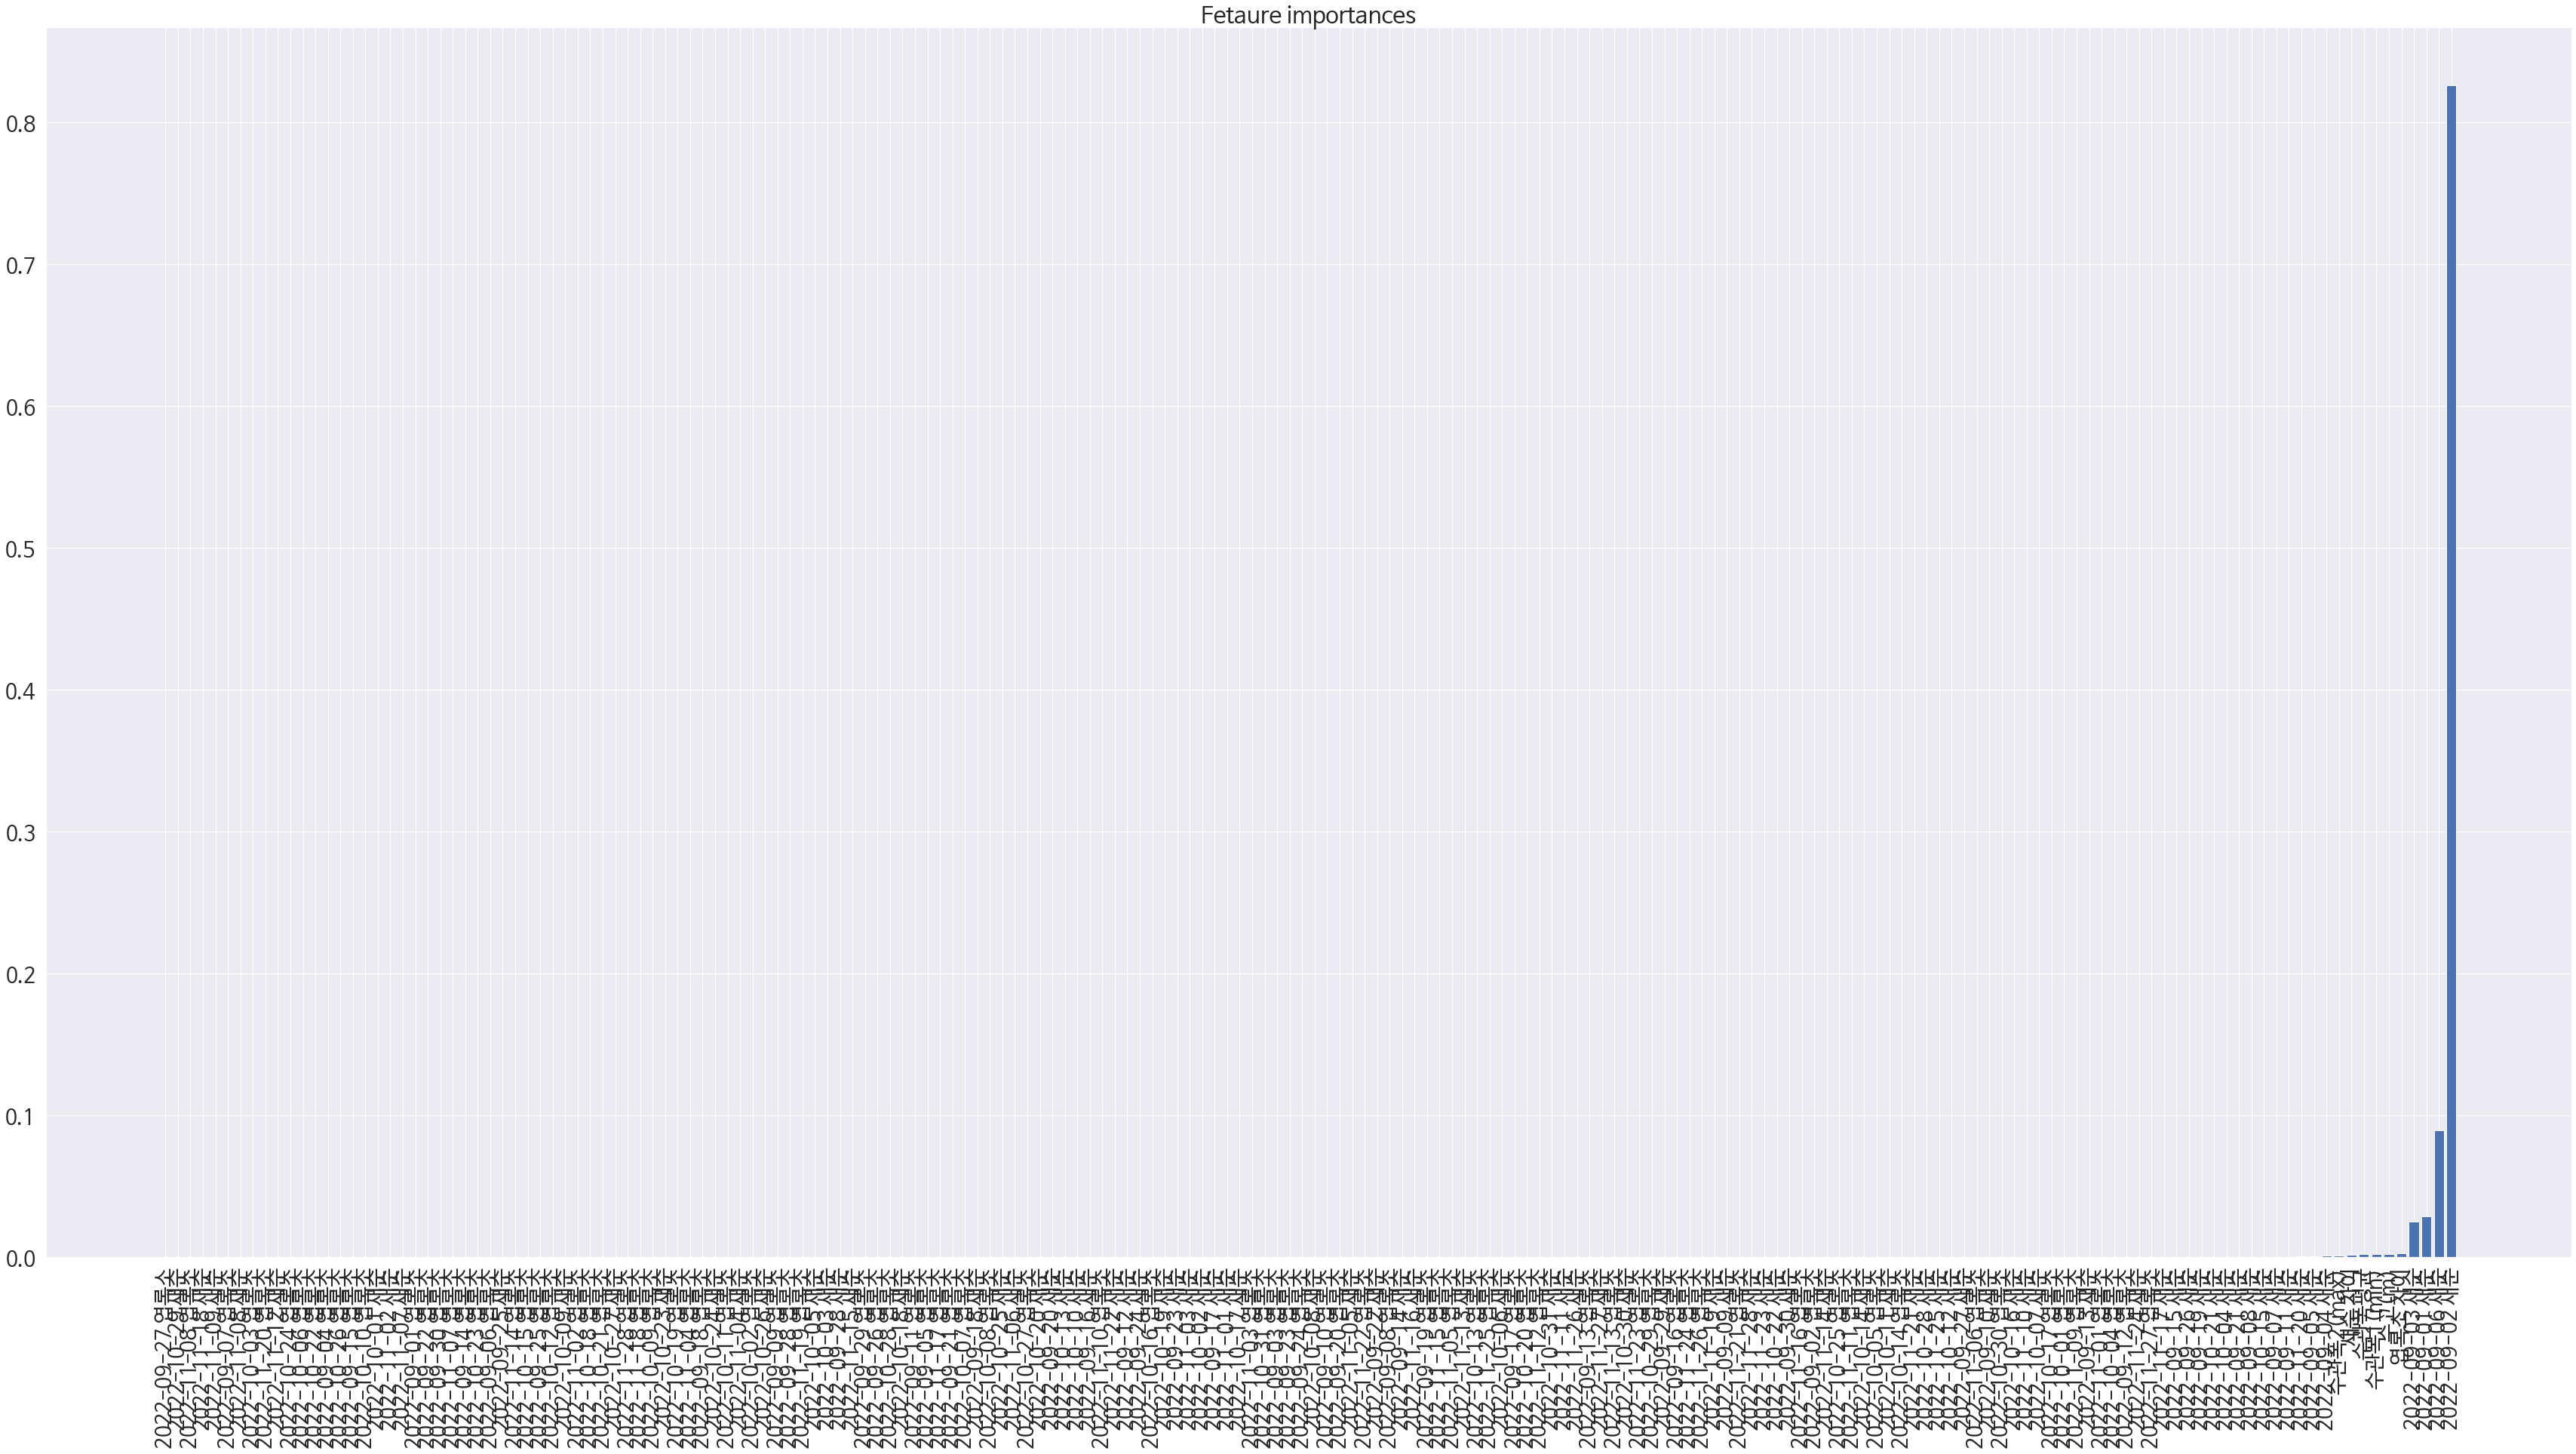

In [43]:
importances = model.feature_importances_

indices_sorted = np.argsort(importances)

plt.figure(figsize = (60,30))
plt.title('Fetaure importances')
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X_train.columns[indices_sorted], rotation = 90)
plt.show()

* 9월 초 새순 데이터 값 > 수고 > 수관폭 평균 > 수관폭 1(min) > 수관폭 2(max) 순으로 속성 중요도가 높게 나타났다.
* 새순 차이와 엽록소 차이를 추가해준 이후에는 9월 초 새순 데이터 값 > 엽록소 차이 > 수고 > 수관폭 1(min) > 수관폭 평균 > 새순 차이 > 수관폭 2(max) 순으로 속성 중요도가 높게 나타났다.
* 시계열 형태인 새순과 엽록소 데이터를 조정해주어야 할 것 같다.

## 5.4 결과 저장

In [44]:
sub['착과량(int)'] = pred
sub.to_csv('/content/drive/MyDrive/data/감귤/sample_submission.csv', index=False)

In [45]:
sub

,ID,착과량(int)
0,TEST_0000,201.0
1,TEST_0001,771.0
2,TEST_0002,112.0
3,TEST_0003,461.0
4,TEST_0004,667.0
...,...,...
2203,TEST_2203,758.0
2204,TEST_2204,391.0
2205,TEST_2205,347.0
2206,TEST_2206,237.0


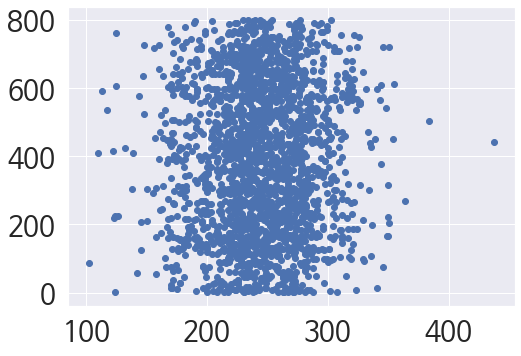

In [46]:
# 학습된 모델로 예측된 착과량과 수고의 분포 보기
df_test['착과량(int)'] = pred
plt.scatter(df_test['수고(m)'], df_test['착과량(int)'])